In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Here we'll analyze StarCraft 2 dataset with characteristics of played games

df = pd.read_csv('SkillCraft.csv')
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [4]:
print(df.shape)

(3338, 20)


In [5]:
print(df.columns)

Index(['GameID', 'LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed'],
      dtype='object')


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3338 entries, 0 to 3337
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3338 non-null   int64  
 1   LeagueIndex           3338 non-null   int64  
 2   Age                   3338 non-null   int64  
 3   HoursPerWeek          3338 non-null   int64  
 4   TotalHours            3338 non-null   int64  
 5   APM                   3338 non-null   float64
 6   SelectByHotkeys       3338 non-null   float64
 7   AssignToHotkeys       3338 non-null   float64
 8   UniqueHotkeys         3338 non-null   int64  
 9   MinimapAttacks        3338 non-null   float64
 10  MinimapRightClicks    3338 non-null   float64
 11  NumberOfPACs          3338 non-null   float64
 12  GapBetweenPACs        3338 non-null   float64
 13  ActionLatency         3338 non-null   float64
 14  ActionsInPAC          3338 non-null   float64
 15  TotalMapExplored     

Text(0, 0.5, 'Amount of games')

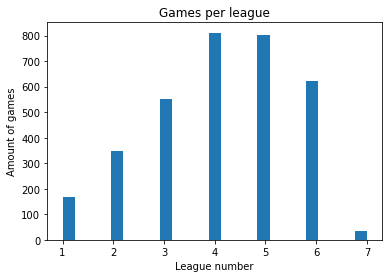

In [7]:
# let's find out how many games are in each League

plt.hist(df['LeagueIndex'], bins=25)
plt.title('Games per league')
plt.xlabel('League number')
plt.ylabel('Amount of games')

Text(0, 0.5, 'Average age')

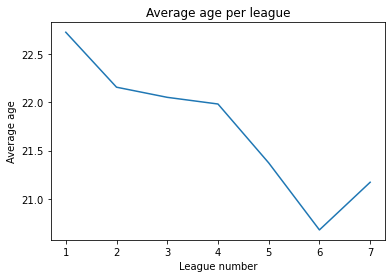

In [44]:
# In StarCraft 2 there are 8 leagues, including Professional league
# It's look like we have no games in 8 league

# Ok, now we want to find out how old StarCraft 2 players in general and per each league at mean?

average = []
for i in range(1, 8):
    df_av_age = df[(df['LeagueIndex'] == i)]
    average.append(df_av_age['Age'].mean())
average = pd.DataFrame(average, columns=['average age'])
plt.plot(list(range(1, 8)), average)
plt.title('Average age per league')
plt.xlabel('League number')
plt.ylabel('Average age')

Text(0, 0.5, 'Amount of games')

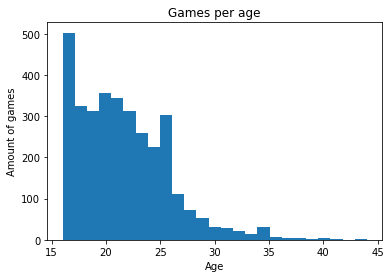

In [46]:
plt.hist(df['Age'], bins=25)
plt.title('Games per age')
plt.xlabel('Age')
plt.ylabel('Amount of games')

Text(0, 0.5, 'Average APM')

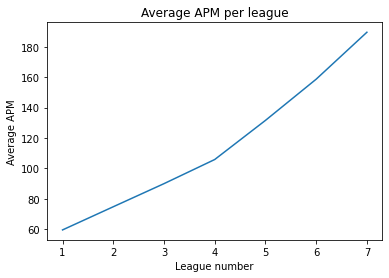

In [50]:
# Apparently, majority of games were played by young players 
# Also young players are more successful in high leagues games

# APM - actions per minutes, it gives us an information how quick are player's actions 

APM = []
for i in range(1, 8):
    df_av_age = df[(df['LeagueIndex'] == i)]
    APM.append(df_av_age['APM'].mean())
APM = pd.DataFrame(APM, columns=['average apm'])
plt.plot(list(range(1, 8)), APM)
plt.title('Average APM per league')
plt.xlabel('League number')
plt.ylabel('Average APM')

Text(0, 0.5, 'Age')

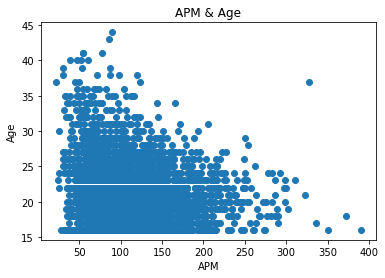

In [56]:
# As we can see it's almost linear dependence
# Good players are almost three times quicker than players in first league
# Do young players quicker than older ones?

plt.scatter(df['APM'], df['Age'])
plt.title('APM & Age')
plt.xlabel('APM')
plt.ylabel('Age')

In [ ]:
# We can deffinetly say that there is no dependence between player's age and his APM